In [ ]:
#%pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/920.8 kB 621.2 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 621.2 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 609.6 kB/s eta 0:00:01
   -------------------------------------- 920.8/920.8 kB 638.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Define antecedents (inputs)
air_temperature = ctrl.Antecedent(np.arange(30, 111,1), 'air_temperature') # from 30 till 110 increase by 1 
soil_moisture = ctrl.Antecedent(np.arange(5, 31,1), 'soil_moisture') # from 5 till 30 increase by 1 

In [4]:
# Define consequents (outputs)
watering_duration = ctrl.Consequent(np.arange(5, 61,1), 'watering_duration')

In [5]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
#air_temperature.automf(5)
#soil_moisture.automf(3)

In [6]:
# Define fuzzy membership functions
# Set the membership functions for the input variables
# .universe Refers to the full range of possible values (e.g., [0, 100])

#Any temperature ≤ 30°: Fully "cold" (membership = 1).
#Between 30° and 40°: Still fully "cold."
#Between 40° and 47°: Gradually less "cold" (e.g., 43.5° might have a membership of 0.5).
#≥ 47°: Not "cold" at all (membership = 0).

air_temperature['cold'] = fuzz.trapmf(air_temperature.universe, [30, 30, 40, 47]) #trapezidal
air_temperature['cool'] = fuzz.trimf(air_temperature.universe, [40, 55, 70]) # triangular
air_temperature['normal'] = fuzz.trimf(air_temperature.universe, [60, 72, 84])
air_temperature['warm'] = fuzz.trimf(air_temperature.universe, [75, 87, 98])
air_temperature['hot'] = fuzz.trapmf(air_temperature.universe, [90, 95, 110, 110])
soil_moisture['dry'] = fuzz.trapmf(soil_moisture.universe, [5, 5, 8, 12])
soil_moisture['moist'] = fuzz.trapmf(soil_moisture.universe, [10, 13, 18, 22])
soil_moisture['wet'] = fuzz.trapmf(soil_moisture.universe, [20, 25, 30, 30])
# Set the membership functions for the output variable
watering_duration['short'] = fuzz.trapmf(watering_duration.universe, [5, 5, 10, 20])
watering_duration['medium'] = fuzz.trapmf(watering_duration.universe, [10, 20, 40,50])
watering_duration['long'] = fuzz.trapmf(watering_duration.universe, [40, 45, 60, 60])

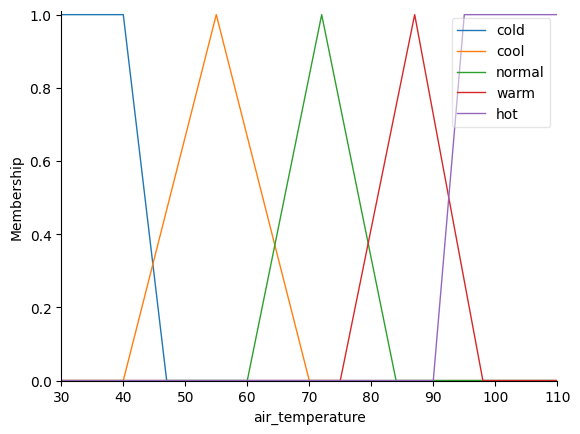

In [7]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
air_temperature.view()

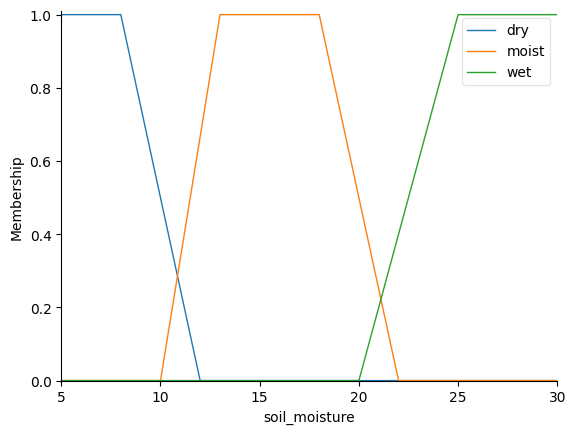

In [8]:
soil_moisture.view()

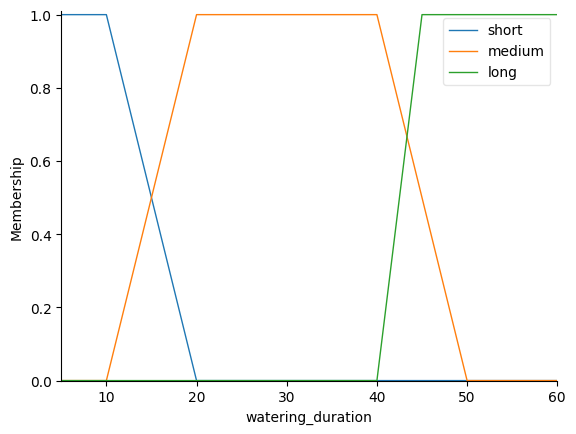

In [9]:
watering_duration.view()

In [10]:
# Define fuzzy rules
rule1 = ctrl.Rule(air_temperature['hot'] & soil_moisture['dry'], watering_duration['long'])
rule2 = ctrl.Rule(air_temperature['warm'] & soil_moisture['moist'], watering_duration['medium'])
rule3 = ctrl.Rule(air_temperature['warm'] & soil_moisture['dry'], watering_duration['long'])
rule4 = ctrl.Rule(air_temperature['hot'] & soil_moisture['moist'], watering_duration['medium'])

In [11]:
# Create fuzzy control system
sprinkler_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [12]:
# Create fuzzy simulator
sprinkler_simulator = ctrl.ControlSystemSimulation(sprinkler_system)

In [13]:
# Set input values
sprinkler_simulator.input['air_temperature'] = 92
sprinkler_simulator.input['soil_moisture'] = 11

In [14]:
# Run simulator
# Evaluate the control system
sprinkler_simulator.compute()

In [15]:
# Get output value
watering_duration_value = sprinkler_simulator.output['watering_duration']


In [16]:
# Print output value
print(f"The watering duration is {round(watering_duration_value, 1)}%")

The watering duration is 34.6%


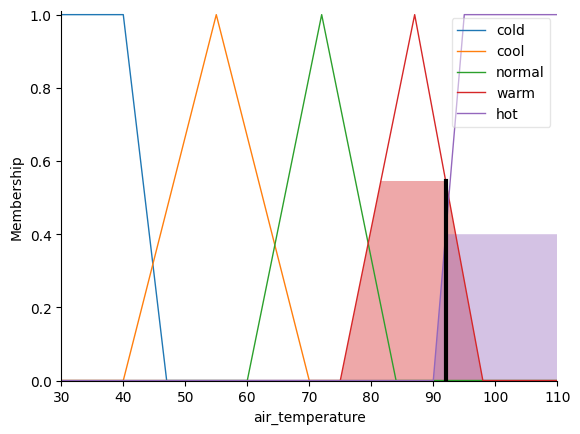

In [17]:
# Display fuzzy membership functions
# Visualize membership functions (optional)
air_temperature.view(sprinkler_simulator) # 92

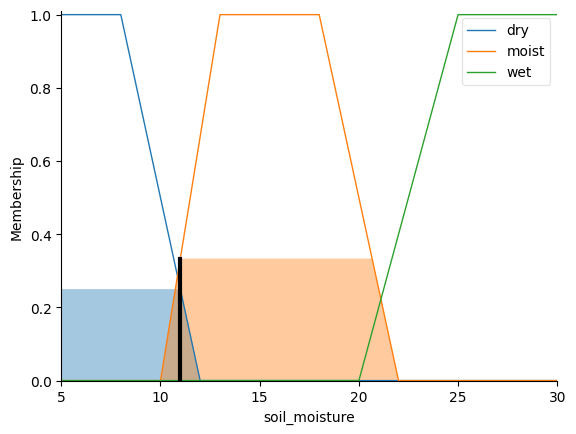

In [18]:
soil_moisture.view(sprinkler_simulator) # 11

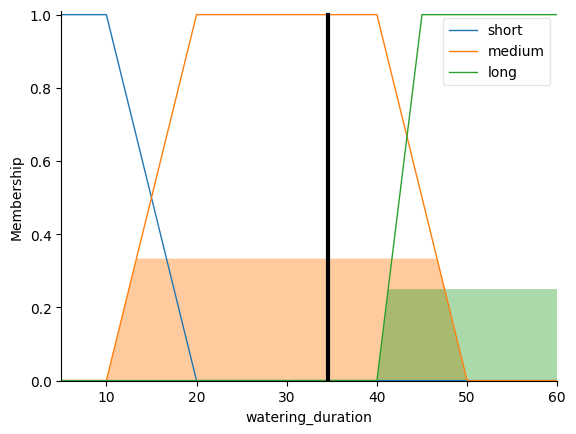

In [19]:
watering_duration.view(sprinkler_simulator) # 34.6